In [4]:
%matplotlib inline
import glob, os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
directory = '/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed'
os.chdir(directory)
totdf = pd.DataFrame
contentlist = []
for path in glob.glob("GeneralData/data_*.csv"):
    df = pd.read_csv(path,index_col=None, header=0)
    contentlist.append(df)
    totdf = pd.concat(contentlist)

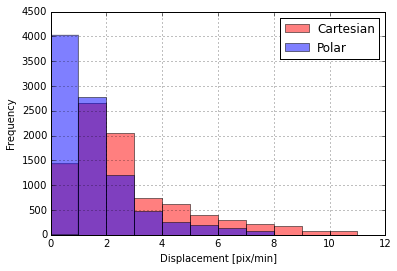

In [7]:
ax1 = totdf.Cartesian_Displacement.hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11], color='red', label = 'Cartesian', alpha=0.5)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Displacement [pix/min]')
totdf.Polar_Displacement.hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11], color='blue',  label = 'Polar', alpha=0.5, ax=ax1)
ax1.legend(loc='upper right')
plt.savefig(directory+'/Graphs/Total_Analysis/DisplacementHistogram.pdf')

In [8]:
print('Total µNS foci: '+ str(int(len(totdf.Polar_Displacement)/399)))

Total µNS foci: 23


/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


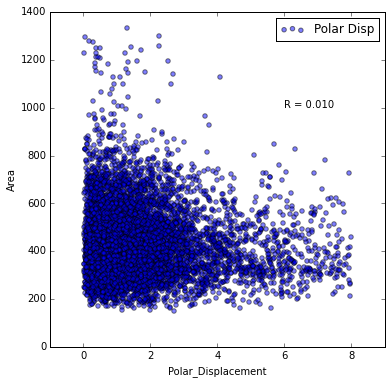

In [9]:
ax = totdf.plot(kind='scatter', x = 'Polar_Displacement', y = 'Area',alpha=0.5,label = 'Polar Disp', color = 'blue', figsize=(6,6))
ax.set_yscale('linear')
corr2 = ((1-(totdf.Area.corr(totdf.Polar_Displacement))**2)/len(totdf))**(0.5)
ax.annotate('R = %.3f'%corr2, (6, 1000))